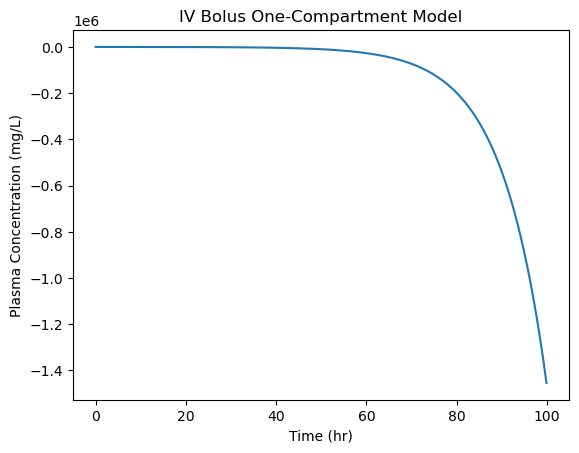

In [5]:
import numpy as np
import matplotlib.pyplot as plt

volume = 20 # L
elimination_rate = 1
absorption_rate = 2
dose = 1000 # mg

ka = absorption_rate / volume
ke = elimination_rate / volume
fraction_absorbed = ka / (ka + ke)
c0 = dose / volume

t = np.arange(0, 100, 0.1)

C = ((ka*fraction_absorbed*dose)/(volume*(ka-ke)))* (np.exp(-ke*t)-np.exp(ka*t))

plt.plot(t, C)
plt.xlabel('Time (hr)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.title('IV Bolus One-Compartment Model')
plt.show()


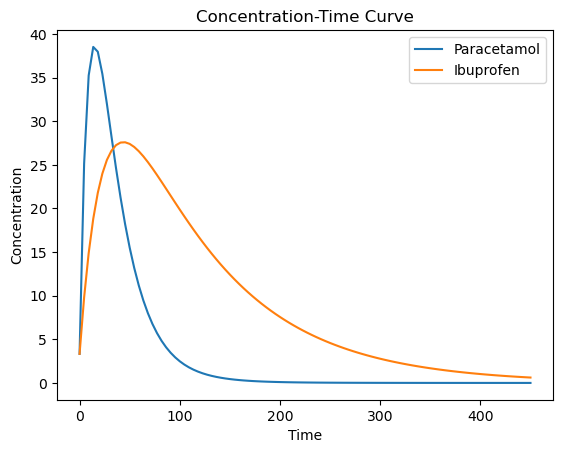

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the pharmacokinetic equation for a one-compartment model
def one_compartment_model(dose, clearance, volume, absorption_rate, elimination_rate, time):
    ka = absorption_rate / volume
    ke = elimination_rate / volume
    fraction_absorbed = ka / (ka + ke)
    c0 = dose / volume
    cp = c0 * fraction_absorbed * np.exp(-ka * time) * (1 - np.exp(-(ka+ke)*time)) / (ka + ke)
    cp += c0 * (1 - fraction_absorbed) * np.exp(-ke * time)
    return cp

# Define the parameters for paracetamol
paracetamol_dose = 500.0
paracetamol_clearance = 10.0
paracetamol_volume = 50.0
paracetamol_absorption_rate = 2.0
paracetamol_elimination_rate = 1.0

# Define the parameters for ibuprofen
ibuprofen_dose = 500.0
ibuprofen_clearance = 20.0
ibuprofen_volume = 100.0
ibuprofen_absorption_rate = 1.0
ibuprofen_elimination_rate = 2.0

# Generate the concentration-time curves for paracetamol and ibuprofen
time = np.linspace(0, 450, 100)
paracetamol_concentration = one_compartment_model(paracetamol_dose, paracetamol_clearance, paracetamol_volume, 
    paracetamol_absorption_rate, paracetamol_elimination_rate, time)
ibuprofen_concentration = one_compartment_model(ibuprofen_dose, ibuprofen_clearance, ibuprofen_volume, 
    ibuprofen_absorption_rate, ibuprofen_elimination_rate, time)

# Generate the concentration-time curve graph
fig, ax = plt.subplots()
ax.plot(time, paracetamol_concentration, label='Paracetamol')
ax.plot(time, ibuprofen_concentration, label='Ibuprofen')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.set_title('Concentration-Time Curve')
ax.legend()

plt.show()